# CarND-Behavioral-Cloning-P3

In [1]:
import csv
import os
import cv2
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 


In [2]:
SAVED_DIM_TRACKS_DIR='/home/ubuntu/udacity/saved_sim_tracks'

samples=[]
def prepare_data():
    path_to_strip='/Users/deanhart/Documents/udacity/self-driving-car-engineer-nanodegree/saved_sim_tracks'
    with open(os.path.join(SAVED_DIM_TRACKS_DIR, 'driving_log.csv')) as csvFile:
        reader = csv.reader(csvFile)
        for line in reader:
            line[0] = line[0].replace(path_to_strip,SAVED_DIM_TRACKS_DIR)
            line[1] = line[1].replace(path_to_strip,SAVED_DIM_TRACKS_DIR)
            line[2] = line[2].replace(path_to_strip,SAVED_DIM_TRACKS_DIR)
            samples.append(line)

prepare_data()            
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

print('train_samples: ', len(train_samples))
print('validation_samples: ', len(validation_samples))

train_samples:  4823
validation_samples:  1206


## Config

In [3]:
original_height=160
original_width=320

top_crop=60
bottom_crop=20
left_crop=0
right_crop=0

resize_to_height=66
resize_to_width=200

angle_offset=0.3

batch_size=128

model_mode='nvidia-v2'

## Visualize Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

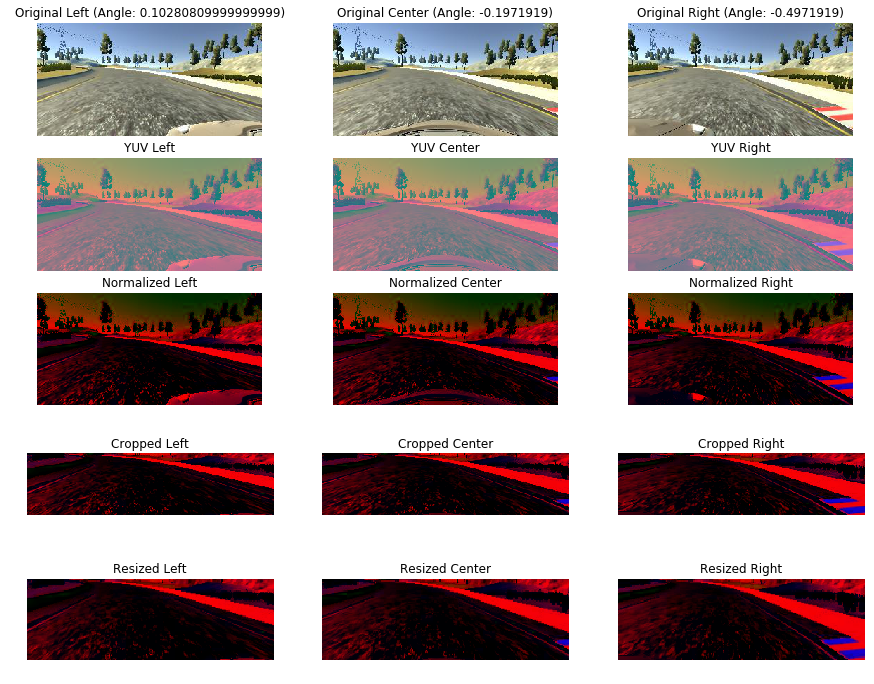

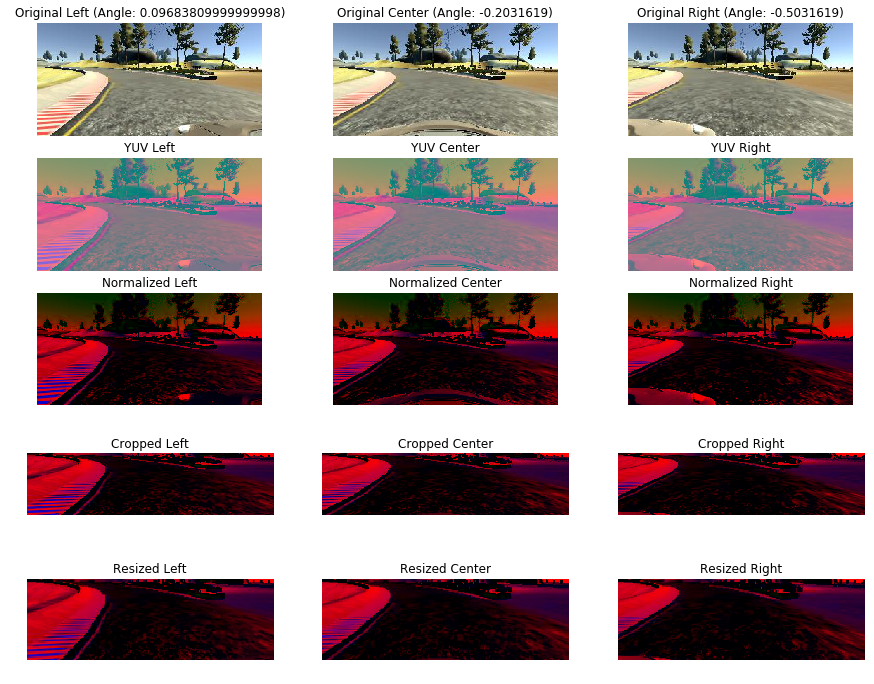

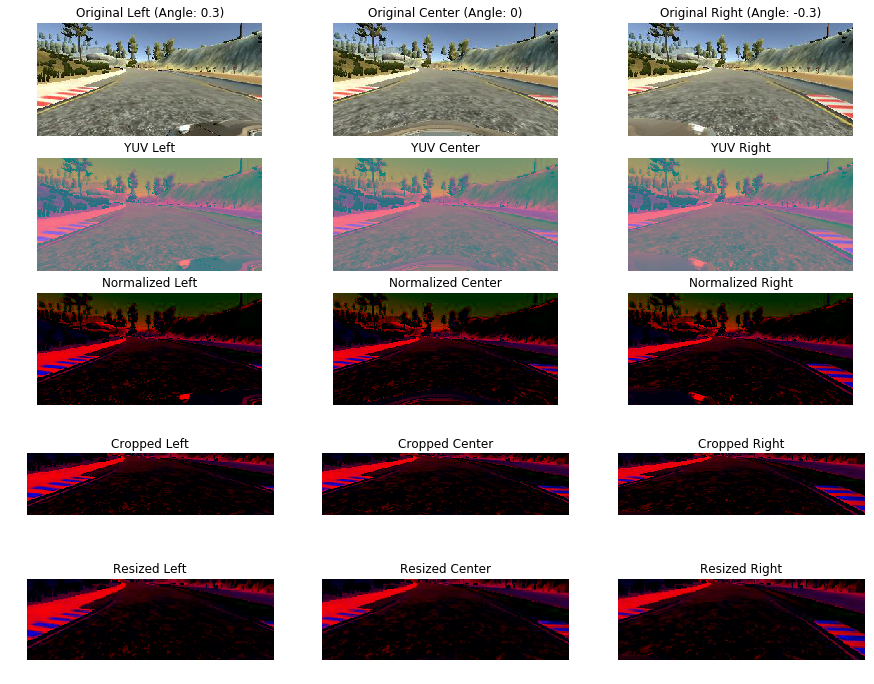

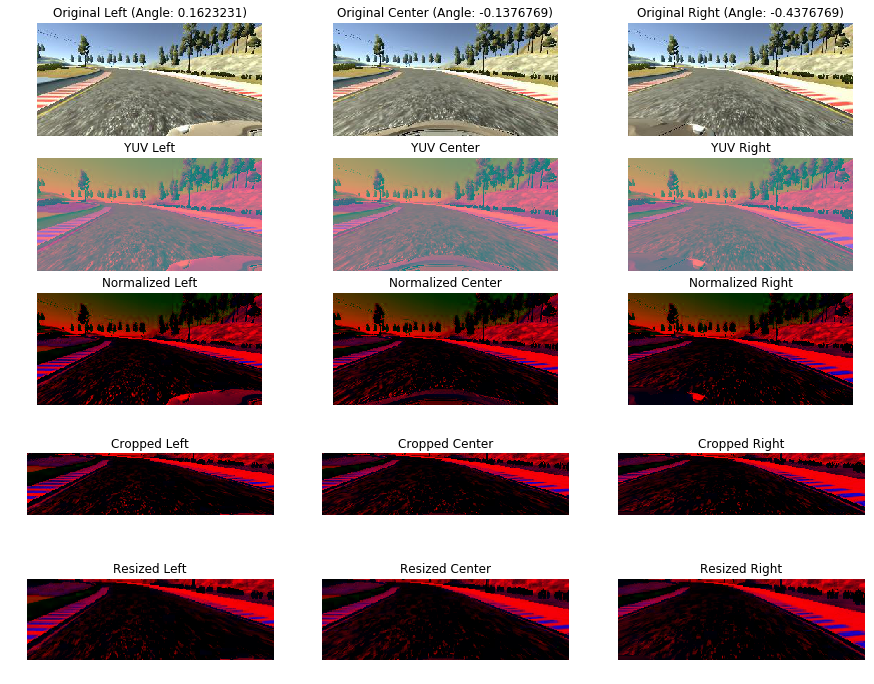

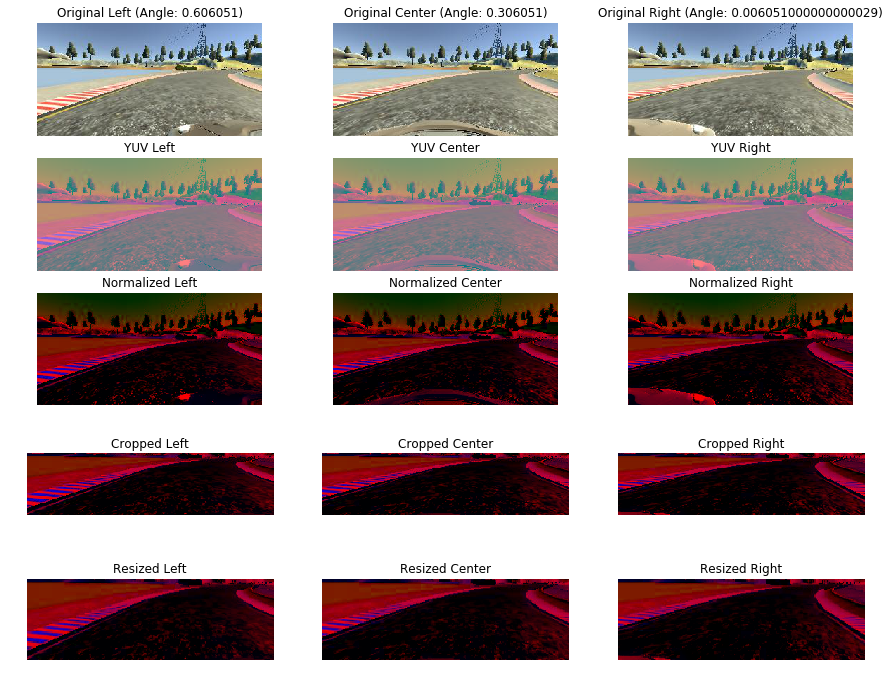

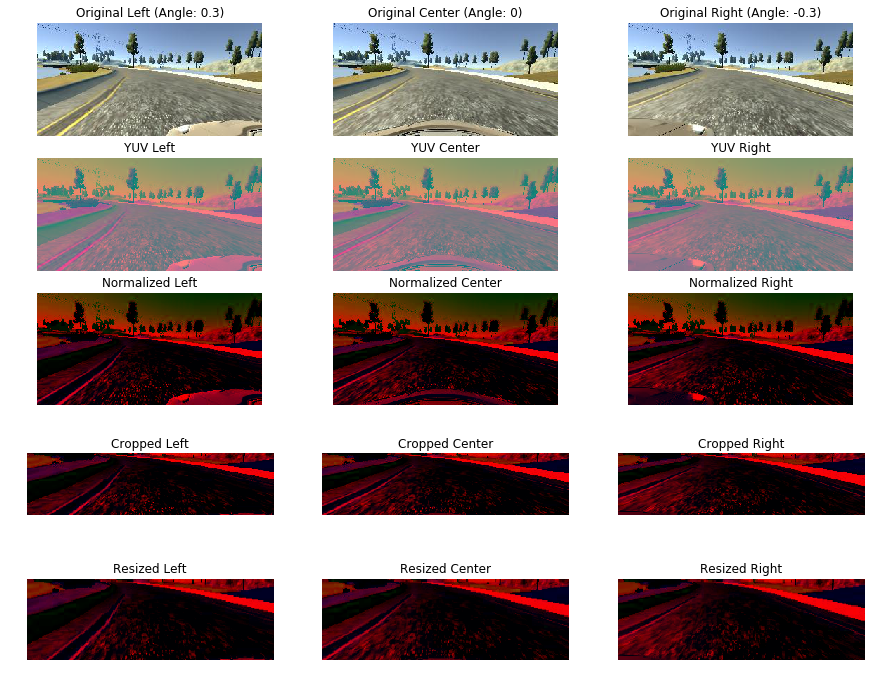

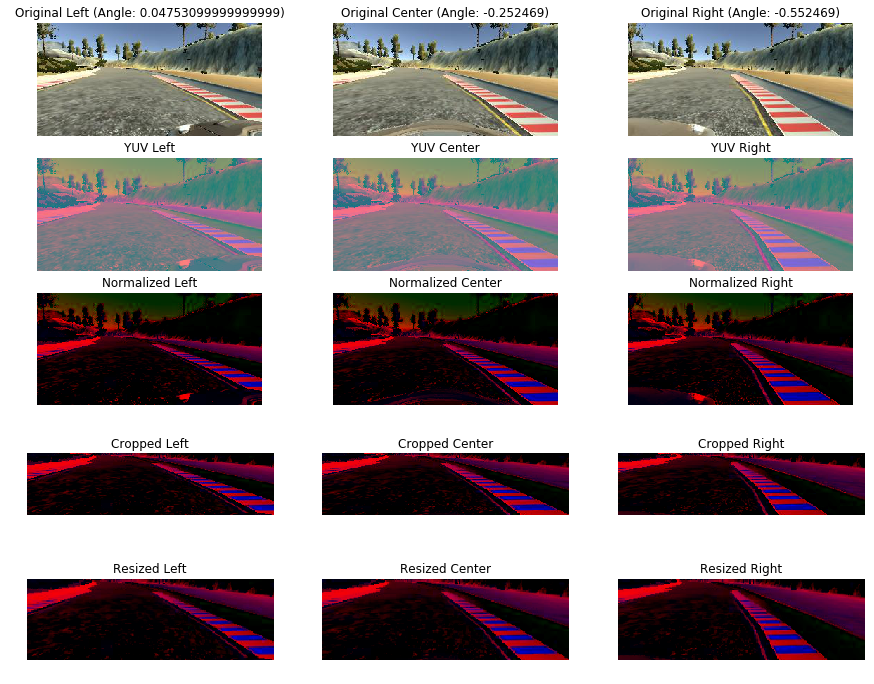

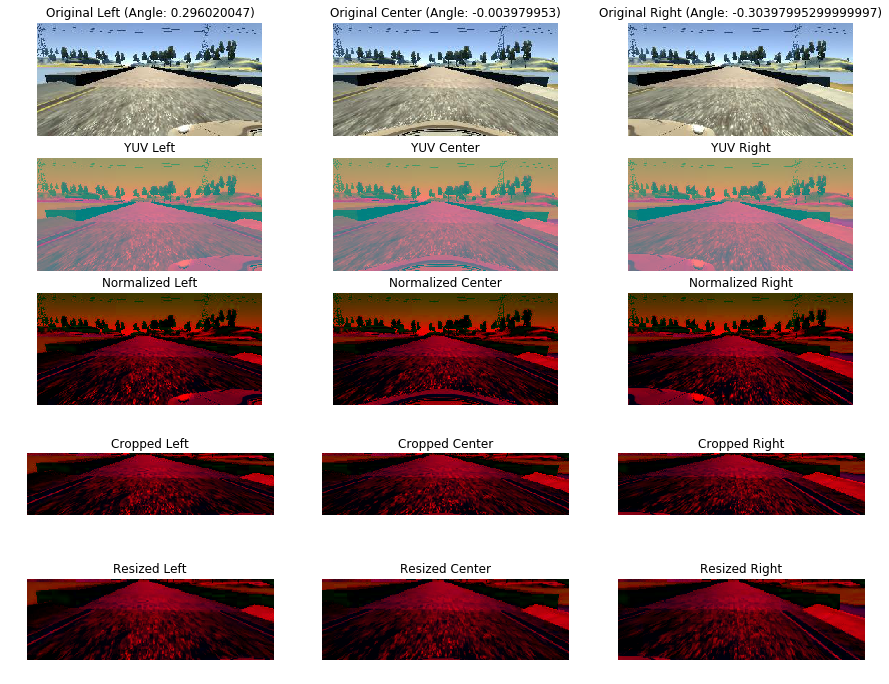

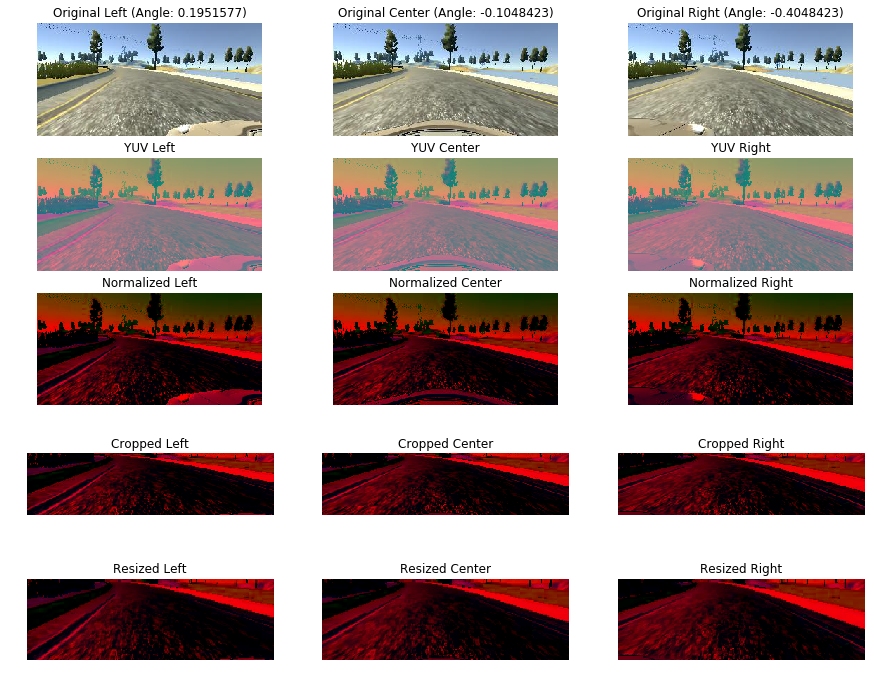

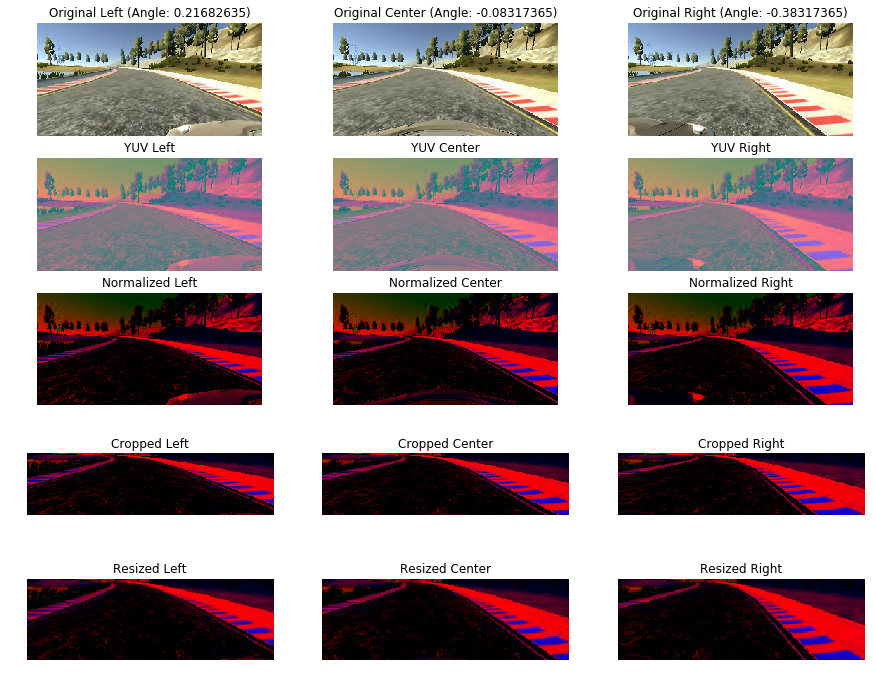

In [16]:
# Display a sample of the original images
import random

def visualize_original(total_to_display):
    
    for i,idx in enumerate(random.sample(range(0, len(train_samples)), total_to_display)):
        
        fig, axs = plt.subplots(5, 3, figsize=(15, 12))

        center_image_path=train_samples[idx][0]
        left_image_path=train_samples[idx][1]
        right_image_path=train_samples[idx][2]
        steering_angle=train_samples[idx][3]
        throttle=train_samples[idx][4]
        brake=train_samples[idx][5]
        speed=train_samples[idx][6]
        
        left_steering_angle=float(steering_angle)+angle_offset
        right_steering_angle=float(steering_angle)-angle_offset
        
        center_image=cv2.cvtColor(cv2.imread(center_image_path), cv2.COLOR_BGR2RGB)
        left_image=cv2.cvtColor(cv2.imread(left_image_path), cv2.COLOR_BGR2RGB)
        right_image=cv2.cvtColor(cv2.imread(right_image_path), cv2.COLOR_BGR2RGB)    

        
        axs[0,0].imshow(left_image)
        axs[0,0].set_title('Original Left (Angle: {0})'.format(left_steering_angle))
        axs[0,0].axis('off')

        axs[0,1].imshow(center_image)
        axs[0,1].set_title('Original Center (Angle: {0})'.format(steering_angle))
        axs[0,1].axis('off')

        axs[0,2].imshow(right_image)
        axs[0,2].set_title('Original Right (Angle: {0})'.format(right_steering_angle))
        axs[0,2].axis('off')   
        
        yuv_center_image=cv2.cvtColor(center_image, cv2.COLOR_RGB2YUV)
        yuv_left_image=cv2.cvtColor(left_image, cv2.COLOR_RGB2YUV)
        yuv_right_image=cv2.cvtColor(right_image, cv2.COLOR_RGB2YUV)    

        
        axs[1,0].imshow(yuv_left_image)
        axs[1,0].set_title('YUV Left')
        axs[1,0].axis('off')

        axs[1,1].imshow(yuv_center_image)
        axs[1,1].set_title('YUV Center')
        axs[1,1].axis('off')

        axs[1,2].imshow(yuv_right_image)
        axs[1,2].set_title('YUV Right')
        axs[1,2].axis('off')   

        
        norm_center_image=yuv_center_image/127.5-1
        norm_left_image=yuv_left_image/127.5-1
        norm_right_image=yuv_right_image/127.5-1
    
        axs[2,0].imshow(norm_left_image)
        axs[2,0].set_title('Normalized Left')
        axs[2,0].axis('off')

        axs[2,1].imshow(norm_center_image)
        axs[2,1].set_title('Normalized Center')
        axs[2,1].axis('off')

        axs[2,2].imshow(norm_right_image)
        axs[2,2].set_title('Normalized Right')
        axs[2,2].axis('off') 

        
        cropped_center_image=norm_center_image[top_crop:original_height-bottom_crop, left_crop:original_width-right_crop]
        cropped_left_image=norm_left_image[top_crop:original_height-bottom_crop, left_crop:original_width-right_crop]
        cropped_right_image=norm_right_image[top_crop:original_height-bottom_crop, left_crop:original_width-right_crop]
    
        axs[3,0].imshow(cropped_left_image)
        axs[3,0].set_title('Cropped Left')
        axs[3,0].axis('off')

        axs[3,1].imshow(cropped_center_image)
        axs[3,1].set_title('Cropped Center')
        axs[3,1].axis('off')

        axs[3,2].imshow(cropped_right_image)
        axs[3,2].set_title('Cropped Right')
        axs[3,2].axis('off') 

        
        resized_center_image=cv2.resize( cropped_center_image, (resize_to_width, resize_to_height))
        resized_left_image=cv2.resize( cropped_left_image, (resize_to_width, resize_to_height))
        resized_right_image=cv2.resize( cropped_right_image, (resize_to_width, resize_to_height))
    
        axs[4,0].imshow(resized_left_image)
        axs[4,0].set_title('Resized Left')
        axs[4,0].axis('off')

        axs[4,1].imshow(resized_center_image)
        axs[4,1].set_title('Resized Center')
        axs[4,1].axis('off')

        axs[4,2].imshow(resized_right_image)
        axs[4,2].set_title('Resized Right')
        axs[4,2].axis('off')
        

visualize_original(10)

## Data Generator

In [26]:


def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                for i in range(0,3):
                    filename = batch_sample[i].split('/')[-1]
                    name = os.path.join(SAVED_DIM_TRACKS_DIR, 'IMG', filename)
                    
#                     # drive.py assumes images are RGB, not the default BGR as cv2 does
#                     img = cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2RGB)

                    # convert to YUV as mentioned in the DAVE-2 paper
                    img = cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2YUV)

                    # determine the angles
                    angle = float(batch_sample[3])
                    if (i==1):
                        angle+=angle_offset
                    elif (i==2):
                        angle-=angle_offset
                        
                    # flip the original images and invert the steering angle
                    flipped_img=cv2.flip(img,1)
                    flipped_angle=angle*-1 
                        
                    # save both the original and flipped image
                    images.append(img)
                    images.append(flipped_img)
                    angles.append(angle)
                    angles.append(flipped_angle)

            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)

## Models

In [18]:
#-------------------------- set gpu using tf ---------------------------
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

#-------------------  start importing keras module ---------------------
import keras.backend.tensorflow_backend as K
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Conv2D, Dropout, ELU, Reshape
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

K._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

### NVidia

In [19]:
if model_mode == 'nvidia':
    model=Sequential()
    # Preprocess incoming data, centered around zero with small standard deviation 
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(original_height,original_width,3)))
    # model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    # crop it
    model.add(Cropping2D(cropping=((top_crop,bottom_crop),(left_crop,right_crop))))

    ##### NVidia
    model.add(Conv2D(24,(5,5),strides=(2,2),activation='relu'))
    model.add(Conv2D(36,(5,5),strides=(2,2),activation='relu'))
    model.add(Conv2D(48,(5,5),strides=(2,2),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))

    model.summary()

    model.compile(loss='mse', optimizer='rmsprop')
    #model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)

    save_to='model-nvidia.h5'

## NVidia V2

Includes 'elu' instead of 'relu' activation function, along with dropouts.

In [27]:
def tf_resize(x):
    resize_to_height=66
    resize_to_width=200
    
    import tensorflow as tf
    return tf.image.resize_images(x,(resize_to_height,resize_to_width))

In [28]:
if model_mode == 'nvidia-v2':
    
    original_height=160
    original_width=320

    top_crop=60
    bottom_crop=20
    left_crop=0
    right_crop=0
    batch_size=128
    
    drop_rate=0.5
    
    model=Sequential()
    
    # Preprocess incoming data, centered around zero with small standard deviation 
    model.add(Lambda(lambda x: x/127.5-1.,input_shape=(original_height,original_width,3), name='norm'))
    
    # crop to remove the car hood and sky
    model.add(Cropping2D(cropping=((top_crop,bottom_crop),(left_crop,right_crop)),
                         data_format='channels_last',name='crop'))
    
    # resize to match the NVidia paper
    model.add(Lambda(tf_resize, name='resize'))
    
    ##### NVidia
    model.add(Conv2D(24,(5,5),strides=(2,2),name='conv1'))
    model.add(ELU(name='elu1'))
    model.add(Conv2D(36,(5,5),strides=(2,2),name='conv2'))
    model.add(ELU(name='elu2'))
    model.add(Conv2D(48,(5,5),strides=(2,2),name='conv3'))
    model.add(ELU(name='elu3'))
    
    model.add(Conv2D(64,(3,3),name='conv4'))
    model.add(ELU(name='elu4'))
    model.add(Conv2D(64,(3,3),name='conv5'))
    model.add(ELU(name='elu5'))
    
    model.add(Flatten(name='flatten'))
    
    model.add(Dense(100,name='dense1'))
    model.add(Dropout(drop_rate, name='drop1'))
    model.add(ELU(name='elu6'))
    model.add(Dense(50,name='dense2'))
    model.add(Dropout(drop_rate, name='drop2'))
    model.add(ELU(name='elu7'))
    model.add(Dense(10,name='dense3'))
    model.add(Dropout(drop_rate, name='drop3'))
    model.add(ELU(name='elu8'))
    
    model.add(Dense(1,name='output'))

    model.summary()

    #lr=0.001
    #optimizer=Adam(lr=lr)
    model.compile(loss='mse', optimizer='adam')

    save_to='model-nvidia-v2-005.h5'


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
norm (Lambda)                (None, 160, 320, 3)       0         
_________________________________________________________________
crop (Cropping2D)            (None, 80, 320, 3)        0         
_________________________________________________________________
resize (Lambda)              (None, 66, 200, 3)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 31, 98, 24)        1824      
_________________________________________________________________
elu1 (ELU)                   (None, 31, 98, 24)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 47, 36)        21636     
_________________________________________________________________
elu2 (ELU)                   (None, 14, 47, 36)        0         
__________

### LeNet

In [ ]:
if model_mode == 'lenet':
    model=Sequential()

    # Preprocess incoming data, centered around zero with small standard deviation 
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(original_height,original_width,3)))
    # crop it
    model.add(Cropping2D(cropping=((top_crop,bottom_crop),(left_crop,right_crop))))

    ##### LeNet
    model.add(Conv2D(10,5,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(50,5,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))

    model.summary()

    model.compile(loss='mse', optimizer='adam')

    save_to='model-lenet.h5'

## Fit the model

In [29]:
early_stopper=EarlyStopping(patience=5, verbose=1)
checkpointer=ModelCheckpoint(save_to, monitor='val_loss', verbose=1, save_best_only=True)

epochs = 100

history_object = model.fit_generator(generator=train_generator, 
                                     steps_per_epoch=len(train_samples) / batch_size, 
                                     validation_data=validation_generator,
                                     validation_steps=len(validation_samples) / batch_size,
                                     callbacks=[checkpointer, early_stopper],
                                     use_multiprocessing=True,
                                     epochs=epochs, 
                                     verbose=1)

model.save(save_to)

Epoch 1/100
38/37 [==============================] - 44s 1s/step - loss: 0.0848 - val_loss: 0.0493

Epoch 00001: val_loss improved from inf to 0.04926, saving model to model-nvidia-v2-005.h5
Epoch 2/100
38/37 [==============================] - 37s 975ms/step - loss: 0.0574 - val_loss: 0.0422

Epoch 00002: val_loss improved from 0.04926 to 0.04217, saving model to model-nvidia-v2-005.h5
Epoch 3/100
38/37 [==============================] - 39s 1s/step - loss: 0.0501 - val_loss: 0.0405

Epoch 00003: val_loss improved from 0.04217 to 0.04053, saving model to model-nvidia-v2-005.h5
Epoch 4/100
38/37 [==============================] - 39s 1s/step - loss: 0.0474 - val_loss: 0.0384

Epoch 00004: val_loss improved from 0.04053 to 0.03840, saving model to model-nvidia-v2-005.h5
Epoch 5/100
38/37 [==============================] - 39s 1s/step - loss: 0.0440 - val_loss: 0.0400

Epoch 00005: val_loss did not improve from 0.03840
Epoch 6/100
38/37 [==============================] - 39s 1s/step - los

Epoch 46/100
38/37 [==============================] - 37s 984ms/step - loss: 0.0173 - val_loss: 0.0193

Epoch 00046: val_loss improved from 0.01938 to 0.01928, saving model to model-nvidia-v2-005.h5
Epoch 47/100
38/37 [==============================] - 39s 1s/step - loss: 0.0169 - val_loss: 0.0196

Epoch 00047: val_loss did not improve from 0.01928
Epoch 48/100
38/37 [==============================] - 39s 1s/step - loss: 0.0169 - val_loss: 0.0190

Epoch 00048: val_loss improved from 0.01928 to 0.01898, saving model to model-nvidia-v2-005.h5
Epoch 49/100
38/37 [==============================] - 39s 1s/step - loss: 0.0163 - val_loss: 0.0199

Epoch 00049: val_loss did not improve from 0.01898
Epoch 50/100
38/37 [==============================] - 39s 1s/step - loss: 0.0162 - val_loss: 0.0193

Epoch 00050: val_loss did not improve from 0.01898
Epoch 51/100
38/37 [==============================] - 39s 1s/step - loss: 0.0156 - val_loss: 0.0193

Epoch 00051: val_loss did not improve from 0.018

## View Results

In [ ]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()